# **Fake News Classifier using NLP and LSTM**

In [4]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df = df.dropna()

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
## Create Dependent and Independent Variables
x = df.drop('label', axis=1)
y = df.label

In [9]:
x.shape

(18285, 4)

In [10]:
y.shape

(18285,)

In [11]:
import keras
import tensorflow as tf
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense

In [12]:
##Vocabulary size
voc_size = 5000


# **One Hot Representation**

In [13]:
messages = x.copy()

In [14]:
messages.reset_index(inplace=True)

In [15]:
import nltk
import re
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
len(messages)

18285

# **Data Preprocessing**

In [18]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [19]:
##One Hot Representation

onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[2731, 138, 3832, 3643, 3339, 2166, 479, 459, 474, 3907],
 [4012, 1969, 1074, 4923, 1572, 3391, 3565],
 [1429, 2959, 4460, 3532],
 [392, 549, 4835, 4029, 145, 642],
 [3151, 1572, 3133, 2932, 1965, 3972, 1572, 4226, 2875, 4497],
 [1639,
  3152,
  1634,
  3482,
  4925,
  2718,
  4525,
  617,
  1389,
  3710,
  4958,
  140,
  4598,
  4196,
  3565],
 [872, 2867, 180, 2871, 1418, 1331, 2860, 2628, 2747, 1751, 1068],
 [3797, 2170, 1371, 1267, 1819, 3388, 2718, 4401, 2747, 1751, 1068],
 [319, 3441, 4466, 1108, 2061, 1547, 3914, 2371, 2718, 4036],
 [3397, 4851, 1473, 3544, 3905, 901, 4783, 1092],
 [3631, 4535, 4556, 2476, 3470, 4514, 2675, 478, 4230, 2519, 3870],
 [4029, 2756, 3339, 1547, 2718, 1819],
 [4077, 78, 534, 4440, 4706, 4703, 2524, 3613, 721],
 [3063, 4216, 4288, 3129, 3634, 2561, 3244, 2747, 1751, 1068],
 [1067, 3771, 4956, 2558, 1567, 2747, 1751, 1068],
 [480, 4106, 4264, 3433, 2577, 1263, 3197, 1444, 4417, 2126],
 [3189, 1610, 1969],
 [3250, 1045, 1771, 4138, 2718, 2928, 90, 3565]

# **Embedding Representation**

In [20]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  459  474 3907]
 [   0    0    0 ... 1572 3391 3565]
 [   0    0    0 ... 2959 4460 3532]
 ...
 [   0    0    0 ... 2747 1751 1068]
 [   0    0    0 ... 1433 3388  342]
 [   0    0    0 ... 4647 2458 4869]]


In [21]:
len(embedded_docs)

18285

In [23]:
##Creating Model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))

model.add(LSTM(100)) ## 1 LSTM Layer that has 100 neurons

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [25]:
x_final.shape, y_final.shape

((18285, 20), (18285,))

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.33, random_state=42)

# **Model Training**

In [28]:
## Finally training 

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 54ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.6171 - val_accuracy: 0.9082
Epoch 2/10
192/192 [==============================] - 8s 42ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.6910 - val_accuracy: 0.9046
Epoch 3/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.4543 - val_accuracy: 0.9069
Epoch 4/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.7358 - val_accuracy: 0.9069
Epoch 5/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.6526 - val_accuracy: 0.9089
Epoch 6/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.7643 - val_accuracy: 0.9056
Epoch 7/10
192/192 [==============================] - 6s 31ms/step - loss: 2.9992e-04 - accuracy: 1.0000 - val_loss: 0.7948 - val_accuracy: 0

# **Plot the train and Validation Accuracy vs the number of epochs**

Text(0.5, 1.0, 'Accuracy VS Epochs')

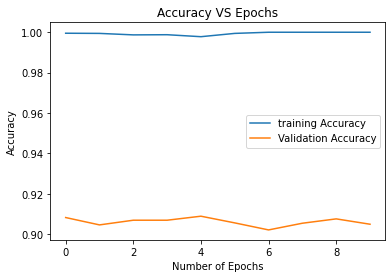

In [29]:
plt.plot(history.history["accuracy"], label="training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy VS Epochs")

# **Plot the train and Validation Loss vs the number of epochs**

Text(0.5, 1.0, 'Loss VS Epochs')

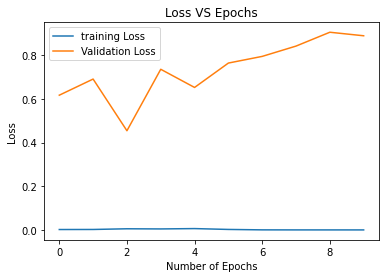

In [30]:
plt.plot(history.history["loss"], label="training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss VS Epochs")

# **Model Performance on Test dataset**

In [31]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
## Accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9048881524440763


In [34]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

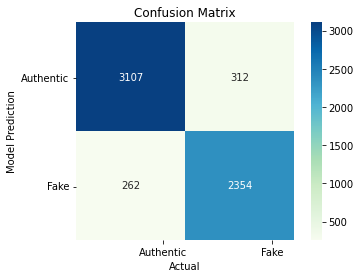

In [44]:
## Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

axes = sns.heatmap(cm, cmap=plt.cm.GnBu, annot=True, square=True, fmt='d' )

class_labels = ['Authentic', 'Fake']

axes.set_xlabel("Actual")
axes.set_ylabel("Model Prediction")

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks+0.3)
axes.set_xticklabels(class_labels, rotation=0)

axes.set_yticks(tick_marks+0.01)
axes.set_yticklabels(class_labels, rotation=0)
axes.set_title("Confusion Matrix")